In [1]:
import ddddocr
import cv2
from PIL import Image
import numpy as np
import os
import base64

In [ ]:
!pip install ddddocr

In [21]:


def base64_to_opencv_image(base64_str):
    # 移除可能存在的base64:前缀
    if base64_str.startswith('base64:'):
        base64_str = base64_str[7:]
    # 将base64字符串解码为二进制数据
    img_data = base64.b64decode(base64_str)
    # 将二进制数据解码为OpenCV图像
    nparr = np.frombuffer(img_data, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

def convert_to_base64(image_input):
    # Check if the input is a local file path
    if isinstance(image_input, str) and os.path.isfile(image_input):
        # Read the image from the file path
        image = cv2.imread(image_input)

    elif isinstance(image_input, bytes):
        # Read the image from bytes
        image = cv2.imdecode(np.frombuffer(image_input, np.uint8), cv2.IMREAD_COLOR)

    elif isinstance(image_input, Image.Image):
        # Read the image from a PIL.Image instance
        image = cv2.cvtColor(np.array(image_input), cv2.COLOR_RGB2BGR)

    elif isinstance(image_input, np.ndarray):
        # Read the image from a cv2 image (numpy array)
        image = image_input

    # Check if the input is a base64 string
    elif isinstance(image_input, str):
        try:
            # Remove 'base64:' prefix if it exists
            if image_input.startswith('base64:'):
                image_input = image_input[7:]
            elif image_input.startswith("data:"):
                image_input = image_input.split(",")[1]

            # Check if the input is a valid base64 string
            image=base64_to_opencv_image(image_input)
        except Exception:
            raise ValueError('Unsupported image_input format.')
    else:
        raise ValueError('Unsupported image_input format.')
    
    return image

def crop_boxes(image_input, boxes, expand=1, ocr_engine=None):
    image=convert_to_base64(image_input)
    # Convert the image to PIL.Image format
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    cropped_images = []
    center_points = []
    text=[]
    # Iterate over the boxes
    for box in boxes:
        x1, y1, x2, y2 = box

        # Expand the box
        x1 = max(0, x1 - expand)
        y1 = max(0, y1 - expand)
        x2 = min(pil_image.width, x2 + expand)
        y2 = min(pil_image.height, y2 + expand)

        # Calculate the center point
        cx, cy = int((x1 + x2) / 2), int((y1 + y2) / 2)
        center_points.append((cx, cy))

        # Crop the image
        cropped_image = pil_image.crop((x1, y1, x2, y2))
        print("type: ============ ",type(cropped_image))
        print(isinstance(cropped_image,  Image.Image))
        if not isinstance(cropped_image, (bytes, str,  Image.Image)):
            print("未知图片类型..............................")
        print(cropped_image)
        
        if ocr_engine:
            res = ocr_engine.classification(cropped_image)
            print(res)
            text.append(res)
            
        # Append the cropped image to the list
        cropped_images.append(cropped_image)

        # Draw a red point on the image according to the center point coordinates
        cv2.circle(image, (cx, cy), 3, (0, 0, 255), -1)

    # Convert the result back to PIL.Image format
    result_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    return cropped_images, center_points,text, result_image






# # Usage example
# image_path = 'path/to/your/image.jpg'
# boxes = [[23, 116, 54, 146], [35, 26, 66, 56], [45, 154, 76, 184], [96, 6, 126, 35], [94, 87, 124, 118], [232, 48, 261, 77], [254, 134, 281, 162]]
# cropped_images, center_points, result_image = crop_boxes(image_path, boxes, expand=2)

# # To access the PIL.Image instances of the cropped images
# # for example, to show the first cropped image
# cropped_images[0].show()

# # To show the image with the red points
# result_image.show()

欢迎使用ddddocr，本项目专注带动行业内卷，个人博客:wenanzhe.com
训练数据支持来源于:http://146.56.204.113:19199/preview
爬虫框架feapder可快速一键接入，快速开启爬虫之旅：https://github.com/Boris-code/feapder
谷歌reCaptcha验证码 / hCaptcha验证码 / funCaptcha验证码商业级识别接口：https://yescaptcha.com/i/NSwk7i
欢迎使用ddddocr，本项目专注带动行业内卷，个人博客:wenanzhe.com
训练数据支持来源于:http://146.56.204.113:19199/preview
爬虫框架feapder可快速一键接入，快速开启爬虫之旅：https://github.com/Boris-code/feapder
谷歌reCaptcha验证码 / hCaptcha验证码 / funCaptcha验证码商业级识别接口：https://yescaptcha.com/i/NSwk7i
[[23, 116, 54, 146], [35, 26, 66, 56], [45, 154, 76, 184], [96, 6, 126, 35], [94, 87, 124, 118], [232, 48, 261, 77], [254, 134, 281, 162]]
type: ============  <class 'PIL.Image.Image'>
True
<PIL.Image.Image image mode=RGB size=33x32 at 0x7F6F31502040>
却
type: ============  <class 'PIL.Image.Image'>
True
<PIL.Image.Image image mode=RGB size=33x32 at 0x7F6F31502220>
厦
type: ============  <class 'PIL.Image.Image'>
True
<PIL.Image.Image image mode=RGB size=33x32 at 0x7F6F31502670>
线
type: ============  <class 'PIL.Image.Im

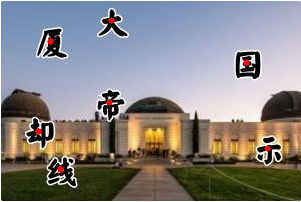

In [26]:
det = ddddocr.DdddOcr(det=True)
ocr = ddddocr.DdddOcr()

img_path="test/capcha2.png"

with open(img_path, 'rb') as f:
    image = f.read()

poses = det.detection(image) #bytes
print(poses) #[[23, 116, 54, 146], [35, 26, 66, 56], [45, 154, 76, 184], [96, 6, 126, 35], [94, 87, 124, 118], [232, 48, 261, 77], [254, 134, 281, 162]]



cropped_images, center_points,text, result_image = crop_boxes(img_path, poses, expand=1,ocr_engine=ocr)


# for crop in poses:
#     # crop.save("_crop.jpg")
#     res = ocr.classification(crop)  # bytes,   str,   pathlib.PurePath,   Image.Image
#     print(res)

    
# cropped_images[0].show()

# To show the image with the red points
result_image.show()

# im = cv2.imread(img_path)

# for box in poses:
#     x1, y1, x2, y2 = box
#     im = cv2.rectangle(im, (x1, y1), (x2, y2), color=(0, 0, 255), thickness=2)

# cv2.imwrite("_result.jpg", im)

In [4]:

ocr = ddddocr.DdddOcr()

with open("test/capcha4.png", 'rb') as f:
    image = f.read()

res = ocr.classification(image)  # bytes,   str,   pathlib.PurePath,   Image.Image
print(res)

欢迎使用ddddocr，本项目专注带动行业内卷，个人博客:wenanzhe.com
训练数据支持来源于:http://146.56.204.113:19199/preview
爬虫框架feapder可快速一键接入，快速开启爬虫之旅：https://github.com/Boris-code/feapder
谷歌reCaptcha验证码 / hCaptcha验证码 / funCaptcha验证码商业级识别接口：https://yescaptcha.com/i/NSwk7i
平遥古城
